In [1]:
import torch
import torchvision.transforms as transforms
from torchvision.transforms.functional import rotate
from torchvision.utils import save_image

# Use my class
import sys
sys.path.append("../")
from load import Load

In [2]:
agmt_dict = {
    'L2_10': [('rotate', 0), ('affine', None), ('rotate', 90), ('rotate', 180)],
    'L2_12': [('rotate', 0), ('affine', None), ('rotate', 30), ('rotate', 60), ('rotate', 90), ('rotate', 120), ('rotate', 150), ('rotate', 180), ('rotate', 210), ('rotate', 240), ('rotate', 270), ('rotate', 300), ('rotate', 330)],
    'L2_15': [('rotate', 0), ('affine', None), ('rotate', 90), ('rotate', 180)],
    'L2_20': [('rotate', 0), ('affine', None), ('rotate', 30), ('rotate', 90), ('rotate', 150), ('rotate', 210), ('rotate', 270), ('rotate', 330)],
    'L2_21': [('rotate', 0), ('affine', None), ('rotate', 30), ('rotate', 90), ('rotate', 150), ('rotate', 210), ('rotate', 270), ('rotate', 330)],
    'L2_24': [('rotate', 0), ('affine', None), ('rotate', 30), ('rotate', 90), ('rotate', 150), ('rotate', 210), ('rotate', 270), ('rotate', 330)],
    'L2_25': [('rotate', 0)],
    'L2_27': [('rotate', 0), ('affine', None), ('rotate', 30), ('rotate', 90), ('rotate', 150), ('rotate', 210), ('rotate', 270), ('rotate', 330)],
    'L2_3': [('rotate', 0), ('affine', None), ('rotate', 30), ('rotate', 60), ('rotate', 90), ('rotate', 120), ('rotate', 150), ('rotate', 180), ('rotate', 210), ('rotate', 240), ('rotate', 270), ('rotate', 300), ('rotate', 330)],
    'L2_30': [('rotate', 0), ('affine', None), ('rotate', 30), ('rotate', 90), ('rotate', 150), ('rotate', 210), ('rotate', 270), ('rotate', 330)],
    'L2_33': [('rotate', 0)],
    'L2_34': [('rotate', 0), ('affine', None), ('rotate', 30), ('rotate', 90), ('rotate', 150), ('rotate', 210), ('rotate', 270), ('rotate', 330)],
    'L2_39': [('rotate', 0), ('affine', None), ('rotate', 30), ('rotate', 90), ('rotate', 150), ('rotate', 210), ('rotate', 270), ('rotate', 330)],
    'L2_40': [('rotate', 0), ('affine', None), ('rotate', 30), ('rotate', 60), ('rotate', 90), ('rotate', 120), ('rotate', 150), ('rotate', 180), ('rotate', 210), ('rotate', 240), ('rotate', 270), ('rotate', 300), ('rotate', 330)],
    'L2_41': [('rotate', 0), ('affine', None), ('rotate', 30), ('rotate', 60), ('rotate', 90), ('rotate', 120), ('rotate', 150), ('rotate', 180), ('rotate', 210), ('rotate', 240), ('rotate', 270), ('rotate', 300), ('rotate', 330)],
    'L2_44': [('rotate', 0), ('affine', None), ('rotate', 30), ('rotate', 90), ('rotate', 150), ('rotate', 210), ('rotate', 270), ('rotate', 330)],
    'L2_45': [('rotate', 0), ('affine', None), ('rotate', 30), ('rotate', 90), ('rotate', 150), ('rotate', 210), ('rotate', 270), ('rotate', 330)],
    'L2_46': [('rotate', 0), ('affine', None), ('rotate', 90), ('rotate', 180)],
    'L2_50': [('rotate', 0), ('affine', None), ('rotate', 30), ('rotate', 90), ('rotate', 150), ('rotate', 210), ('rotate', 270), ('rotate', 330)],
    'L2_52': [('rotate', 0), ('affine', None), ('rotate', 30), ('rotate', 90), ('rotate', 150), ('rotate', 210), ('rotate', 270), ('rotate', 330)],
}

In [3]:
affine = transforms.RandomAffine(
    degrees=(30, 70),
    translate=(0.1, 0.3),
    scale=(0.5, 0.75))

def save_augment_data(image, agmt_list, class_name, filename, path):
    for agmt in agmt_list:
        agmt_name, degree = agmt
        
        if agmt_name == 'rotate':
            agmt_data = rotate(image, degree)
            save_image(agmt_data, path + class_name + f"\\rotate_{str(degree)}_" + filename.split("\\")[-1])
        elif agmt_name == 'affine':
            agmt_data = affine(image)
            save_image(agmt_data, path + class_name + "\\affine_" + filename.split("\\")[-1])
        else:
            raise ValueError("Augment error occured!")

In [4]:
save_path = "..\\augmented_dataset\\train\\"

def augment_data(dataset, agmt_dict):

    for class_name in list(agmt_dict.keys()):
        # make subdirectory(class)
        os.makedirs(os.path.dirname(save_path + class_name + "\\"), exist_ok=True)
        
        class_idx = dataset.class_to_idx[class_name]
        class_idx_list = [
            idx for idx, target_idx in enumerate(dataset.targets)
            if target_idx == class_idx]

        for idx, data_idx in enumerate(class_idx_list):
            filename, _ = dataset.imgs[data_idx]
            
            data = dataset[data_idx][0]
            if class_name in list(agmt_dict.keys()):
                save_augment_data(data, agmt_dict[class_name], class_name, filename, save_path)

In [7]:
import os

transformer = [
    transforms.ToTensor()]

Loader  = Load(transformer)
dataset, _ = Loader("..\\train_val_test_dataset\\train\\")
classes = list(dataset.class_to_idx.keys())

augment_data(dataset, agmt_dict)

D:\programs\Anaconda\envs\RL_module\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [8]:
from os import listdir
import pandas as pd
import matplotlib.pyplot as plt

def draw_class_barplot(
    path: str,
    title: str):
    
    dir_list = listdir(path)

    classLenLst = []
    for class_name in dir_list:
        classLenLst.append(len(listdir(path+class_name)))

    df_dict = dict()
    df_dict["name"] = dir_list
    df_dict["count"] = classLenLst

    df= pd.DataFrame(df_dict)

    plt.figure(figsize=(100,100))
    df.plot(kind="bar", x='name', y='count')
    plt.xlabel("class name")
    plt.ylabel("count")
    plt.title(title)

    return df

전체 데이터의 수: 49191


<Figure size 10000x10000 with 0 Axes>

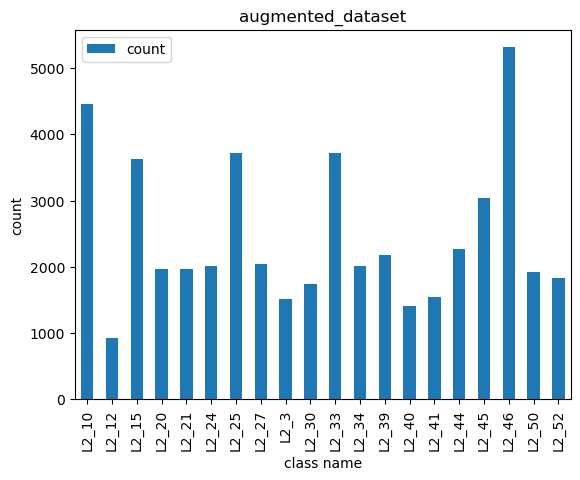

In [9]:
df = draw_class_barplot(r'..\\augmented_dataset\\train\\', 'augmented_dataset')

print(f"전체 데이터의 수: {df['count'].sum(0)}")

## L2_46과 L2_10이 너무 많다 따라서 좀 줄이도록 하겠다

In [10]:
agmt_dict = {
    'L2_10': [('rotate', 0), ('affine', None), ('rotate', 180)],
    'L2_46': [('rotate', 0), ('affine', None), ('rotate', 180)],
}

augment_data(dataset, agmt_dict)

전체 데이터의 수: 46749


<Figure size 10000x10000 with 0 Axes>

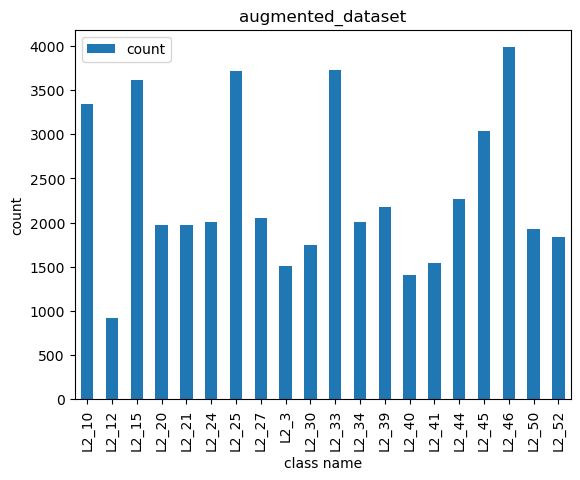

In [11]:
df = draw_class_barplot(r'..\\augmented_dataset\\train\\', 'augmented_dataset')

print(f"전체 데이터의 수: {df['count'].sum(0)}")